DATASET: https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset

# BUSSINES UNDERSTANDING

kismis menjadi toping nikmat yang biasa dipakai saat kita memasak kue atau dessert lainnya, kismis yang terlihat sama saja ternyata memiliki beberapa jenis yang berbeda.

dengan adanya model yang membantu dalam membedakan jenis kismis, akan mempermudah mereka yang ingin mamakai jenis kismis tertentu. maka dari itu model ini dibuat untuk mempermudah hal tersebut.

model ini dibuat menggunakan metode klasifikasi dengan algoritma SVM.

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [4]:
df = pd.read_excel('Raisin_Dataset.xlsx')

# DATA UNDERSTANDING

Informasi Atribut:

Area: Area zona kismis dan jumlah piksel di dalam batas-batasnya.

MajorAxisLength: Jarak antara ujung garis terpanjang yang dapat ditarik dari sebuah bean.

MinorAxisLength: Garis terpanjang yang bisa ditarik dari kismis sambil berdiri tegak lurus pada sumbu utama.

Eccentricity: Eksentrisitas elips yang memiliki momen yang sama dengan wilayahnya.

ConvexArea: Jumlah piksel dalam poligon cembung terkecil yang dapat memuat area  kismis.

Extent: Rasio piksel dalam kotak pembatas terhadap area.

Perimeter: Keliling kismis didefinisikan sebagai panjang batasnya.

Class: jenis kismis ('Kecimen', 'Besni')

In [5]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [6]:
df.shape

(900, 8)

In [7]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [8]:
df['Class'].unique()

array(['Kecimen', 'Besni'], dtype=object)

# DATA PREPARATION

Kecimen    450
Besni      450
Name: Class, dtype: int64

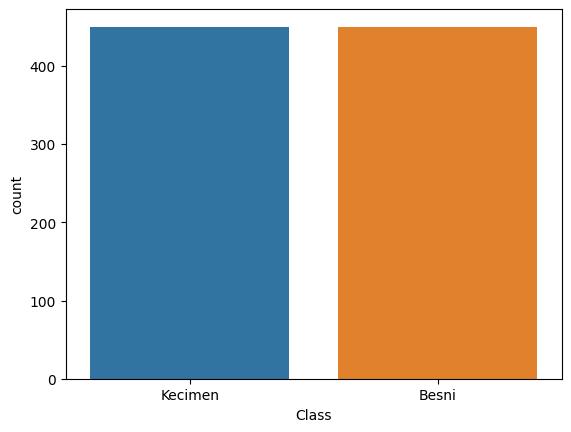

In [9]:
sns.countplot(x = "Class", data = df)
df.loc[:,"Class"].value_counts()

In [10]:
df.replace(('Kecimen', 'Besni'),
           (0,1), inplace=True)

# MODELLING

In [11]:
# memisahkan data dan label
X = df.drop (columns='Class', axis=1)
Y = df['Class']

In [12]:
print(X)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  
0    0.758651   1184.040  
1    0.684130   1121.786  
2    0.637613   1208.575  
3  

In [13]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
895    1
896    1
897    1
898    1
899    1
Name: Class, Length: 900, dtype: int64


3. Standarisasi Data

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
standarized_data = scaler.transform(X)

In [17]:
print(standarized_data)

[[-0.00718637  0.09757695 -0.02395819 ... -0.01570903  1.10674264
   0.06627397]
 [-0.32421719 -0.20901207 -0.22929222 ... -0.3042482  -0.28777679
  -0.16125245]
 [ 0.07829241  0.09775835  0.23698797 ...  0.06211335 -1.15824974
   0.15594468]
 ...
 [ 0.30407232  0.00670023  0.88767401 ...  0.37004063  0.77828911
   0.46387322]
 [ 0.14671134  0.39160036 -0.00624644 ...  0.15871029 -0.76180437
   0.3385864 ]
 [-0.05631357  0.69976181 -0.78493347 ... -0.04881606 -1.26290931
   0.39090133]]


In [18]:
X = standarized_data
Y = df['Class']

In [19]:
print(X)
print(Y)

[[-0.00718637  0.09757695 -0.02395819 ... -0.01570903  1.10674264
   0.06627397]
 [-0.32421719 -0.20901207 -0.22929222 ... -0.3042482  -0.28777679
  -0.16125245]
 [ 0.07829241  0.09775835  0.23698797 ...  0.06211335 -1.15824974
   0.15594468]
 ...
 [ 0.30407232  0.00670023  0.88767401 ...  0.37004063  0.77828911
   0.46387322]
 [ 0.14671134  0.39160036 -0.00624644 ...  0.15871029 -0.76180437
   0.3385864 ]
 [-0.05631357  0.69976181 -0.78493347 ... -0.04881606 -1.26290931
   0.39090133]]
0      0
1      0
2      0
3      0
4      0
      ..
895    1
896    1
897    1
898    1
899    1
Name: Class, Length: 900, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(900, 7) (720, 7) (180, 7)


5. Membuat data latih menggunakan algoritma SVM

In [22]:
classifier = svm.SVC(kernel='linear')

In [23]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [24]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.8666666666666667


In [26]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.8888888888888888


In [28]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


# EVALUATION

7. Membuat Model Prediksi

In [29]:
input_data = (87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print()
print(prediction)
print()
if (prediction[0] == 0):
    print('kismis tersebut termasuk kedalam kategori Kecimen')
else :
    print('kismis tersebut termasuk kedalam kategori Besni')

[[-0.00718637  0.09757694 -0.02395819  0.42313729 -0.01570903  1.10675052
   0.06627397]]

[1]

kismis tersebut termasuk kedalam kategori Besni


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# SAVE MODEL

8. simpan model

In [30]:
import pickle

In [31]:
filename = 'kismis.sav'
pickle.dump(classifier, open(filename,'wb'))
pickle.dump(scaler, open('scaler.sav','wb'))